# Global Power Plant Database

Project Description :

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes 
power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers 
approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass,
waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information
on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database :

The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
•	`country_long` (text): longer form of the country designation
    
•	`name` (text): name or title of the power plant, generally in Romanized form
    
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
    
•	`capacity_mw` (number): electrical generating capacity in megawatts
    
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
•	`primary_fuel` (text): energy source used in primary electricity generation or export
    
•	`other_fuel1` (text): energy source used in electricity generation or export
    
•	`other_fuel2` (text): energy source used in electricity generation or export
    
•	`other_fuel3` (text): energy source used in electricity generation or export
    
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
    
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    
•	`url` (text): web document corresponding to the `source` field
    
•	`geolocation_source` (text): attribution for geolocation information
    
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
•	`year_of_capacity_data` (number): year the capacity information was reported
    
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    
•	`generation_data_source` (text): attribution for the reported generation information
    
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
    
Fuel Type Aggregation :

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(907, 27)

Rows --- 907 

columns --- 27

In [6]:
# checking the missing value ...

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
# check the percentage of null values...

df.isnull().sum() * 100 / len(df)

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [8]:
# use drop method the nan value more than 80%..

df.drop(['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019',
         'estimated_generation_gwh'], inplace = True, axis = 1)

In [9]:
df.shape

(907, 20)

In [10]:
# using fillna method for replace null values with mean for continous(float) columns....

df.fillna(df.mean(), inplace = True)

In [11]:
# using fillna method for replace null values with mode for categorical(object) columns...

mode_values = {'owner' : df['owner'].mode()[0], 'geolocation_source' : df['geolocation_source'].mode()[0],
               'generation_data_source' : df['generation_data_source'].mode()[0]}

In [12]:
df.fillna(value = mode_values, inplace = True)

In [13]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

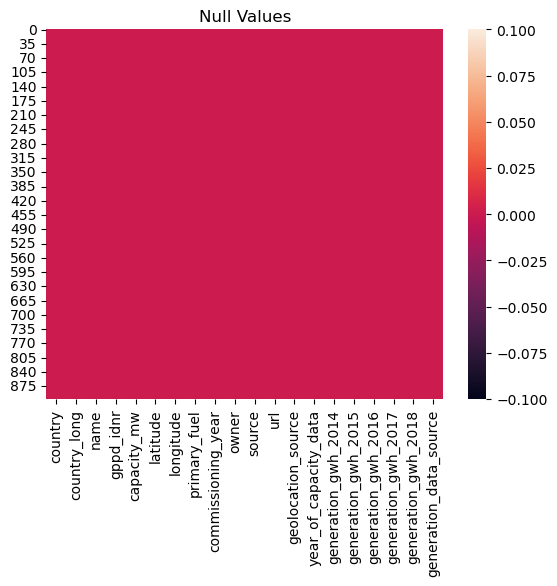

In [14]:
# Using heatmap :

sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

EDA : Expolatory Data Analaysis

In [15]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [16]:
df_visualization_nominal = df[['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'].copy()]

In [17]:
df_visualization_nominal.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [18]:
import seaborn as sns

IND    907
Name: country, dtype: int64


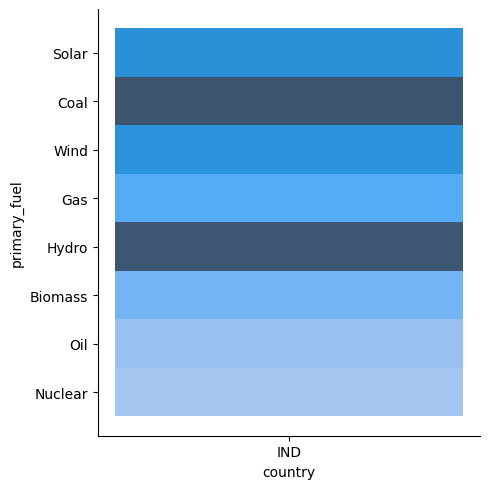

In [19]:
# Data Visualization :

ax = sns.displot(x = 'country', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['country'].value_counts())

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


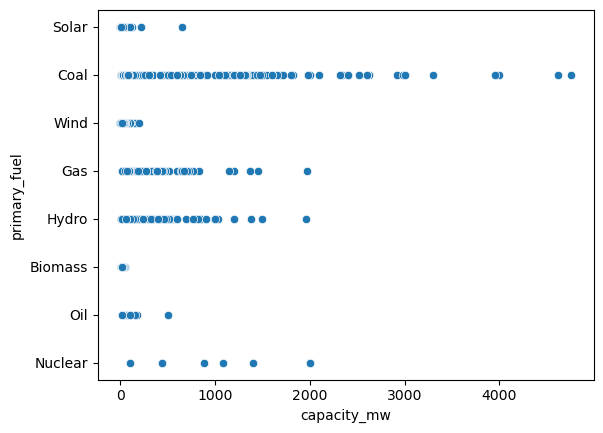

In [20]:
ax = sns.scatterplot(x = 'capacity_mw', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['capacity_mw'].value_counts())

21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: latitude, Length: 837, dtype: int64


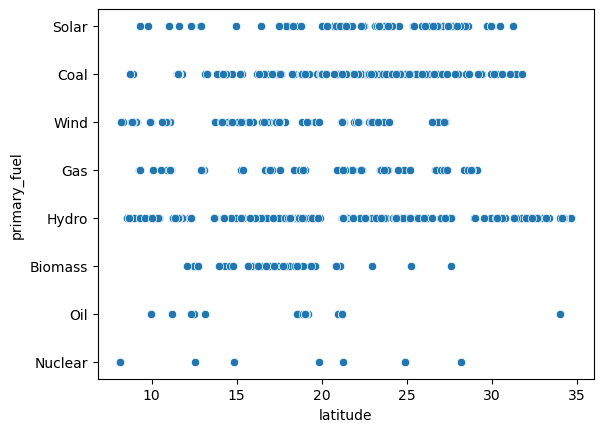

In [21]:
ax = sns.scatterplot(x = 'latitude', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['latitude'].value_counts())

77.464907    46
71.691700     4
75.898800     3
71.691800     3
72.898300     3
             ..
70.396100     1
74.239300     1
77.043500     1
73.825400     1
77.476800     1
Name: longitude, Length: 828, dtype: int64


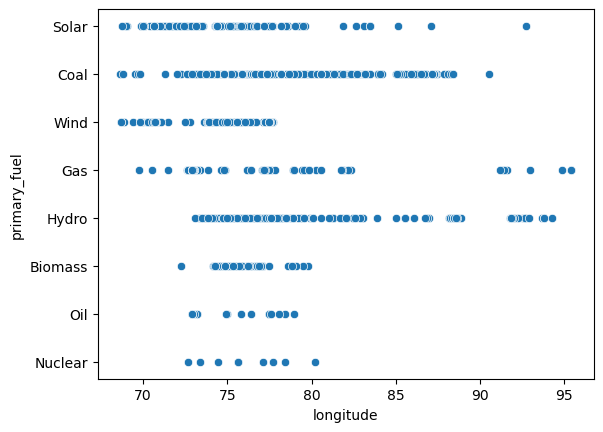

In [22]:
ax = sns.scatterplot(x = 'longitude', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['longitude'].value_counts())

2019.0    907
Name: year_of_capacity_data, dtype: int64


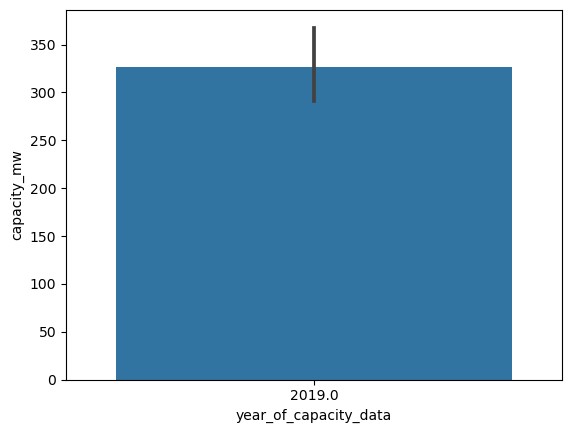

In [23]:
ax = sns.barplot( x = 'year_of_capacity_data', y = 'capacity_mw', data = df_visualization_nominal)
print(df_visualization_nominal['year_of_capacity_data'].value_counts())

2431.82359    509
0.00000        28
359.13980       1
7368.39000      1
9983.01800      1
             ... 
1154.34200      1
451.05340       1
3239.14290      1
3155.00000      1
3194.35982      1
Name: generation_gwh_2014, Length: 372, dtype: int64


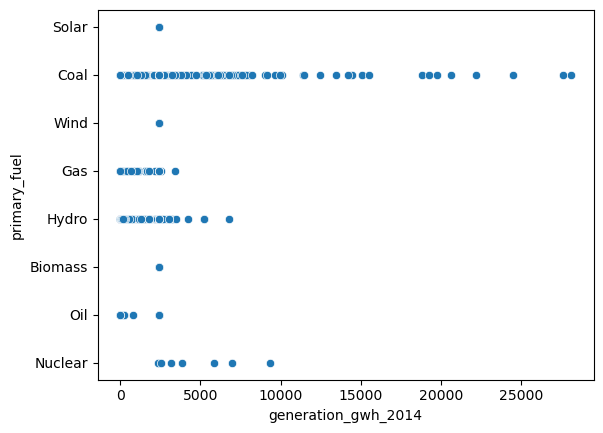

In [24]:
ax = sns.scatterplot( x = 'generation_gwh_2014', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['generation_gwh_2014'].value_counts())

2467.936859     473
0.000000         30
8470.570000       2
1511.000000       2
12.676300         1
               ... 
131.021600        1
6130.019928       1
5931.490000       1
14834.800000      1
233.596650        1
Name: generation_gwh_2016, Length: 404, dtype: int64


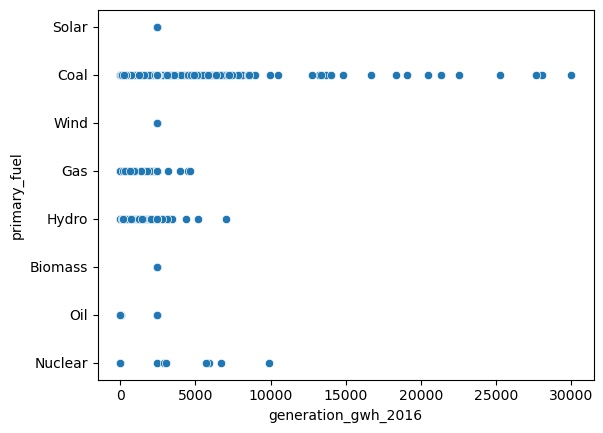

In [25]:
ax = sns.scatterplot( x = 'generation_gwh_2016', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['generation_gwh_2016'].value_counts())

2428.226946     485
0.000000         27
1497.798000       1
10422.690000      1
240.799900        1
               ... 
14192.000000      1
219.377600        1
288.460450        1
410.566850        1
0.994875          1
Name: generation_gwh_2015, Length: 397, dtype: int64


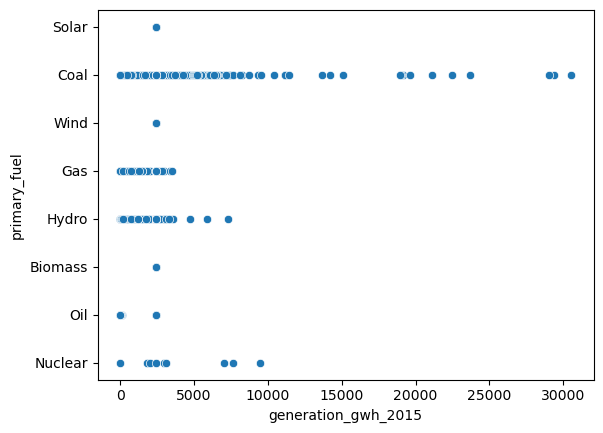

In [26]:
ax = sns.scatterplot( x = 'generation_gwh_2015', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['generation_gwh_2015'].value_counts())

2600.804099     459
0.000000         39
21.939750         1
17.213500         1
7200.400000       1
               ... 
7321.267900       1
6532.350000       1
15305.220000      1
373.970750        1
686.500000        1
Name: generation_gwh_2018, Length: 411, dtype: int64


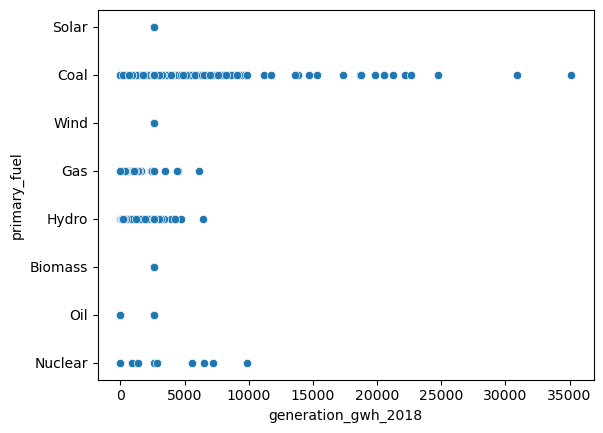

In [27]:
ax = sns.scatterplot( x = 'generation_gwh_2018', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['generation_gwh_2018'].value_counts())

Central Electricity Authority    907
Name: generation_data_source, dtype: int64


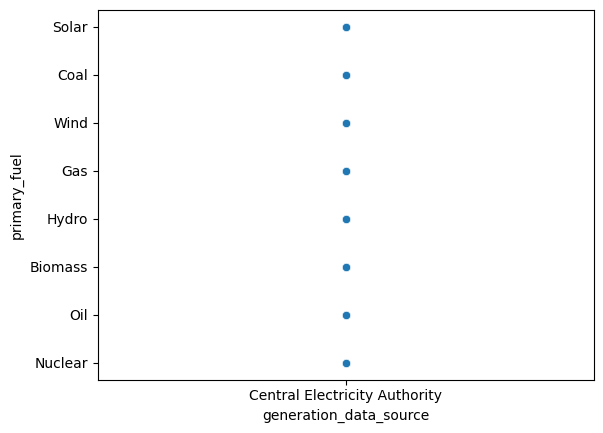

In [28]:
ax = sns.scatterplot( x = 'generation_data_source', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['generation_data_source'].value_counts())

1997.091082    380
2015.000000     28
2013.000000     25
2012.000000     23
2016.000000     19
              ... 
1946.000000      1
1956.000000      1
1937.000000      1
1949.000000      1
1953.000000      1
Name: commissioning_year, Length: 74, dtype: int64


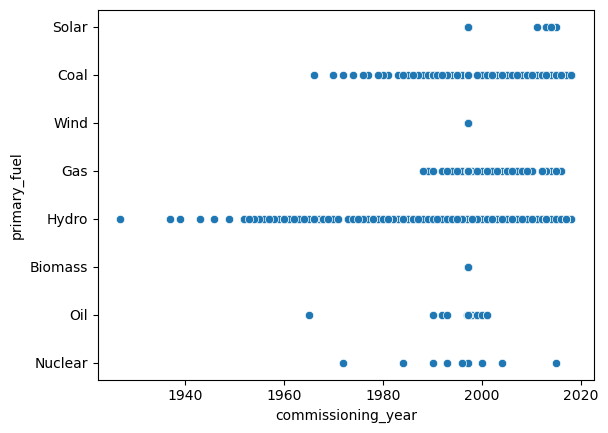

In [29]:
ax = sns.scatterplot(x = 'commissioning_year', y = 'primary_fuel', data = df_visualization_nominal)
print(df_visualization_nominal['commissioning_year'].value_counts())

In [30]:
# symetrical data :

df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
commissioning_year,907.0,1997.091082,13.016360,1927.0000,1997.091082,1997.091082,2003.000000,2018.000
year_of_capacity_data,907.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2014,907.0,2431.823590,2665.338608,0.0000,1211.362750,2431.823590,2431.823590,28127.000
generation_gwh_2015,907.0,2428.226946,2859.349132,0.0000,916.000000,2428.226946,2428.226946,30539.000
generation_gwh_2016,907.0,2467.936859,2877.890004,0.0000,896.500214,2467.936859,2467.936859,30015.000
generation_gwh_2017,907.0,2547.759305,2921.502193,0.0000,882.594850,2547.759305,2547.759305,35116.000
generation_gwh_2018,907.0,2600.804099,3030.808041,0.0000,824.842340,2600.804099,2600.804099,35136.000


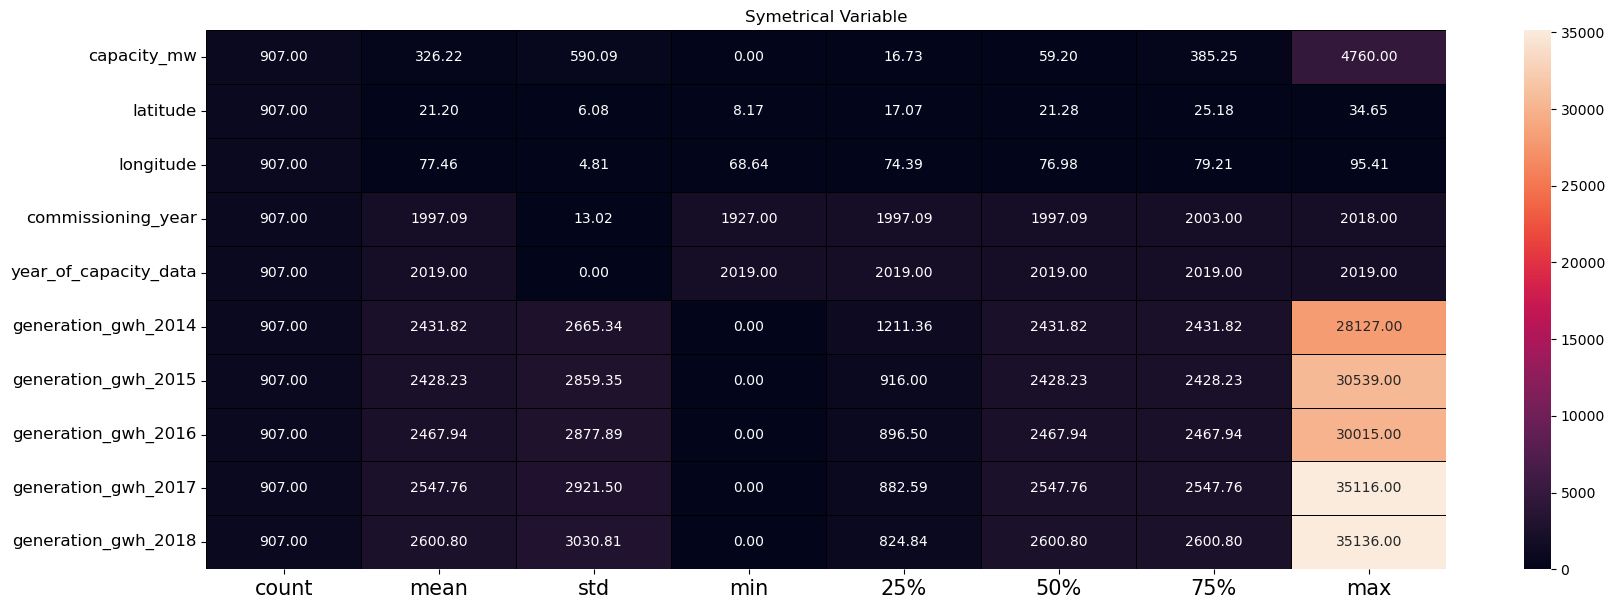

In [31]:
# using heatmap :

import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
sns.heatmap(df.describe().T, annot = True, linewidth = 0.5, linecolor = 'black', fmt = '0.2f')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Symetrical Variable')
plt.show()

In [32]:
# symetrical data using categorical columns :

df.describe(include = ['O'])

,country,country_long,name,gppd_idnr,primary_fuel,owner,source,url,geolocation_source,generation_data_source
count,907,907,907,907,907,907,907,907,907,907
unique,1,1,907,907,8,280,191,304,3,1
top,IND,India,ACME Solar Tower,WRI1020239,Coal,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,907,907,1,1,258,569,519,519,784,907


In [33]:
# correlation :

df.corr()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,NaN,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,NaN,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,NaN,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,NaN,0.133051,0.147338,0.170644,0.170863,0.174377
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,NaN,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,NaN,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,NaN,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,NaN,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,NaN,0.884956,0.923461,0.957159,0.982689,1.000000


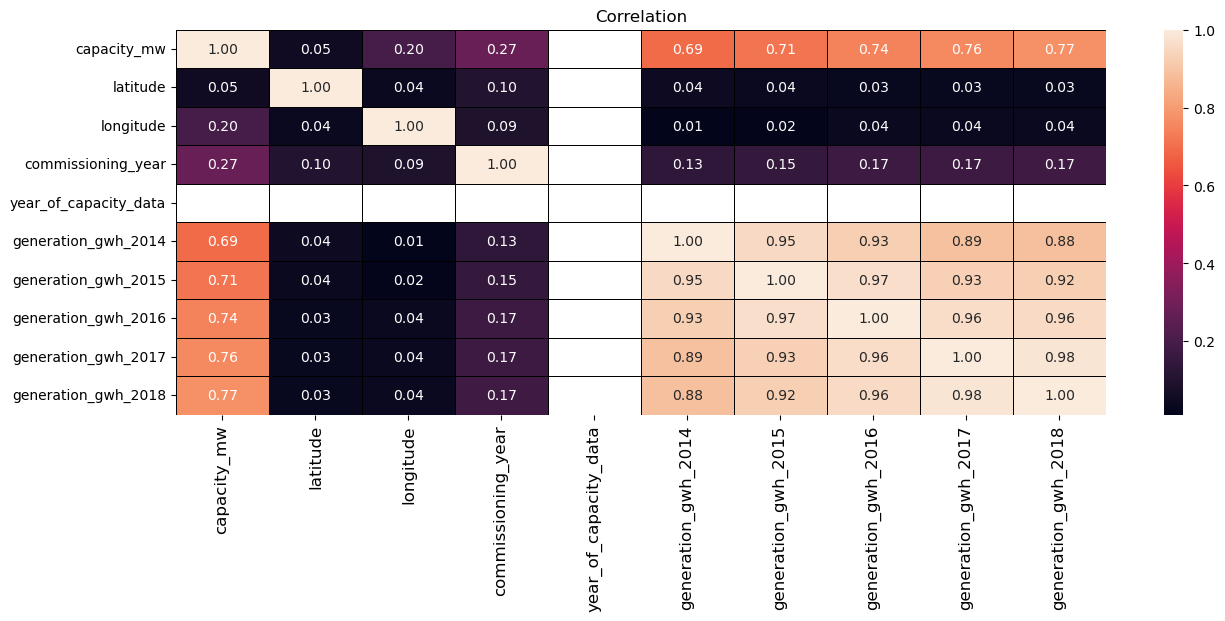

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 10)
plt.title('Correlation')
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', fmt = '0.2f')
plt.show()

In [35]:
# Using Label Encoding method for convert object type to float

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['owner'] = LE.fit_transform(df['owner'])
df['source'] = LE.fit_transform(df['source'])
df['url'] = LE.fit_transform(df['source'])
df['geolocation_source'] = LE.fit_transform(df['geolocation_source'])
df['generation_data_source'] = LE.fit_transform(df['generation_data_source'])
df['country'] = LE.fit_transform(df['country'])
df['country_long'] = LE.fit_transform(df['country_long'])
df['name'] = LE.fit_transform(df['name'])
df['gppd_idnr'] = LE.fit_transform(df['gppd_idnr'])
df['primary_fuel'] = LE.fit_transform(df['primary_fuel'])

In [36]:
df['owner'].value_counts()

5      569
234      4
108      4
136      3
114      3
      ... 
239      1
274      1
55       1
111      1
279      1
Name: owner, Length: 280, dtype: int64

In [37]:
df['source'].value_counts()

22     519
21     124
84      10
109      8
110      6
      ... 
56       1
46       1
164      1
187      1
189      1
Name: source, Length: 191, dtype: int64

In [38]:
df['url'].value_counts()

22     519
21     124
84      10
109      8
110      6
      ... 
56       1
46       1
164      1
187      1
189      1
Name: url, Length: 191, dtype: int64

In [39]:
df['geolocation_source'].value_counts()

2    784
0    119
1      4
Name: geolocation_source, dtype: int64

In [40]:
df['generation_data_source'].value_counts()

0    907
Name: generation_data_source, dtype: int64

In [41]:
df['country'].value_counts()

0    907
Name: country, dtype: int64

In [42]:
df['country_long'].value_counts()

0    907
Name: country_long, dtype: int64

In [43]:
df['name']

0        0
1        1
2        2
3        3
4        4
      ... 
902    902
903    903
904    904
905    905
906    906
Name: name, Length: 907, dtype: int32

In [44]:
df['gppd_idnr'].value_counts()

657    1
336    1
326    1
501    1
616    1
      ..
155    1
156    1
157    1
158    1
876    1
Name: gppd_idnr, Length: 907, dtype: int64

In [45]:
df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    int32  
 1   country_long            907 non-null    int32  
 2   name                    907 non-null    int32  
 3   gppd_idnr               907 non-null    int32  
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    int32  
 8   commissioning_year      907 non-null    float64
 9   owner                   907 non-null    int32  
 10  source                  907 non-null    int32  
 11  url                     907 non-null    int64  
 12  geolocation_source      907 non-null    int32  
 13  year_of_capacity_data   907 non-null    float64
 14  generation_gwh_2014     907 non-null    fl

In [47]:
df.shape

(907, 20)

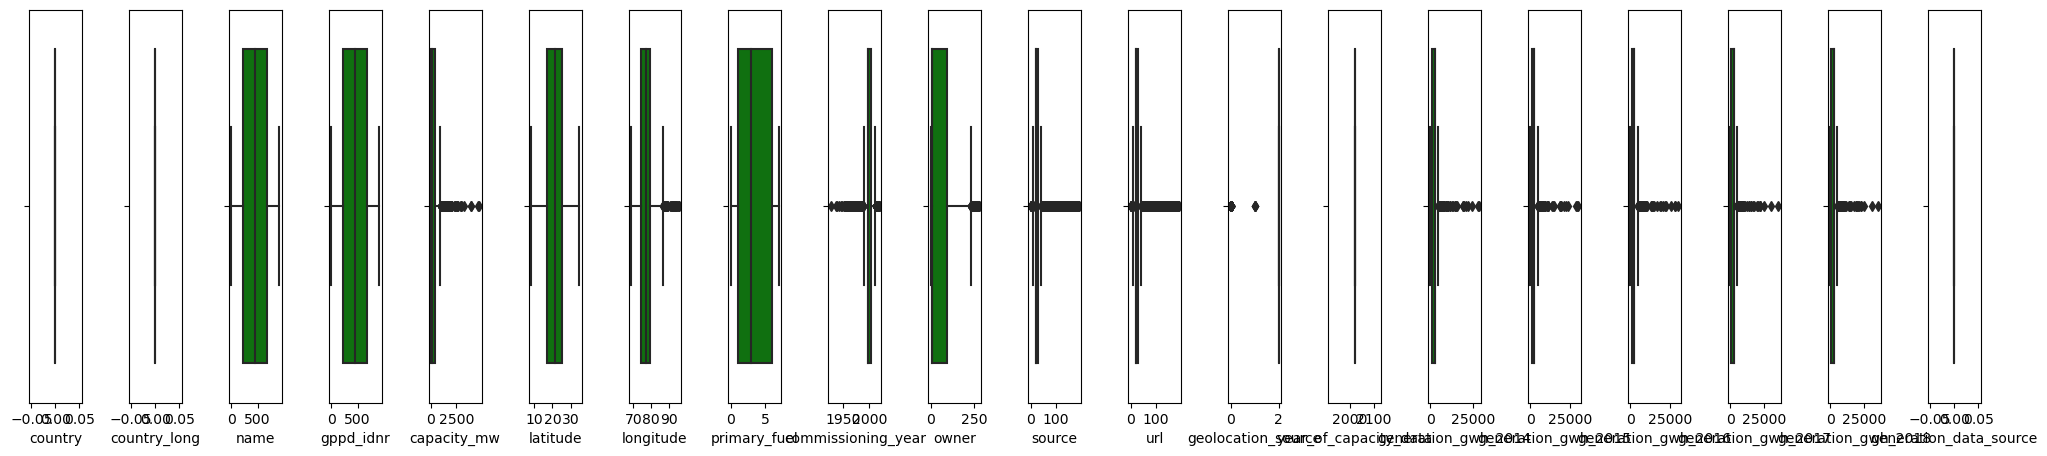

In [48]:
# Checking Outlier :

collist = df.columns.values
ncol = 30
nrows = 20
plt.figure(figsize = (ncol, 3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[collist[i]], color = 'green', orient = 'v')
    plt.tight_layout()

In [49]:
# Removing Outliers :

x = df.iloc[ : , : -1]   # considering all rows and target variable
y = df.iloc[ : , -1]

In [50]:
# using Zscore method for remove the outlier :

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))

In [51]:
threshold = 3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  71,  80,  80, 143, 143, 143, 143,
       143, 143, 147, 158, 179, 183, 191, 191, 209, 209, 209, 209, 209,
       209, 222, 244, 299, 299, 308, 308, 308, 308, 308, 308, 321, 321,
       323, 333, 340, 342, 345, 345, 360, 363, 364, 364, 364, 364, 364,
       364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493, 493,
       493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538, 541,
       546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 648, 648,
       648, 657, 657, 657, 657, 657, 657, 661, 661, 669, 669, 689, 689,
       695, 695, 695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 724,
       724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 728, 767, 786,
       786, 786, 786, 786, 786, 788, 807, 808, 808, 808, 808, 808, 808,
       818, 832, 832, 847, 848, 870, 870, 871, 871, 879, 879, 880, 880,
       880, 880, 880, 880, 895, 895, 900, 900], dtype=int64), array([ 4, 15, 16, 17, 18, 10, 11, 10, 11,  4, 14, 15, 16, 17, 18,  4, 14

In [52]:
x = x[(z<3).all(axis = 1)]
print(df.shape)
print(x.shape)
# x.shape

(907, 20)
(0, 19)


In [53]:
y = y [(z<3). all(axis = 1)]

In [54]:
y.shape

(0,)

In [55]:
# Percentage loss of Data..

loss_percent = (907 - 0)/ 907 *100
print(loss_percent)

100.0


In [56]:
# Checking Skewness :

df.skew()

country                   0.000000
country_long              0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
primary_fuel              0.472251
commissioning_year       -1.399359
owner                     1.364406
source                    1.827373
url                       1.827373
geolocation_source       -2.159841
year_of_capacity_data     0.000000
generation_gwh_2014       5.035446
generation_gwh_2015       5.364134
generation_gwh_2016       5.068427
generation_gwh_2017       5.110952
generation_gwh_2018       4.937907
generation_data_source    0.000000
dtype: float64

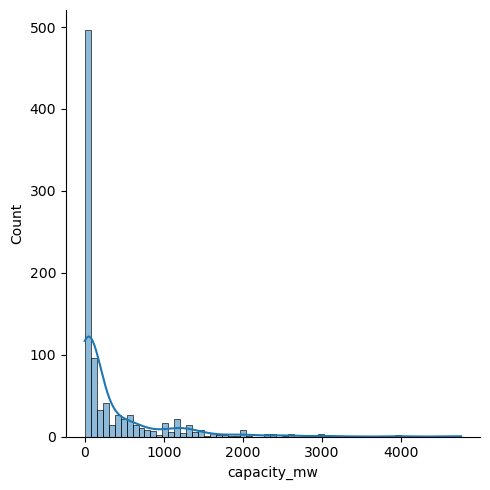

In [57]:
# Distribution plot for checking the skewness :

sns.displot(df['capacity_mw'], kde = True)

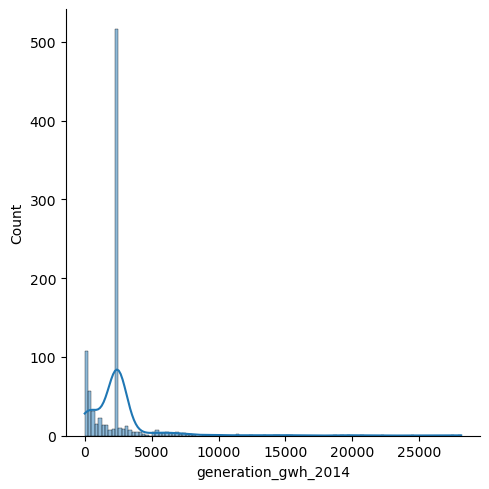

In [58]:
sns.displot(df['generation_gwh_2014'], kde = True)

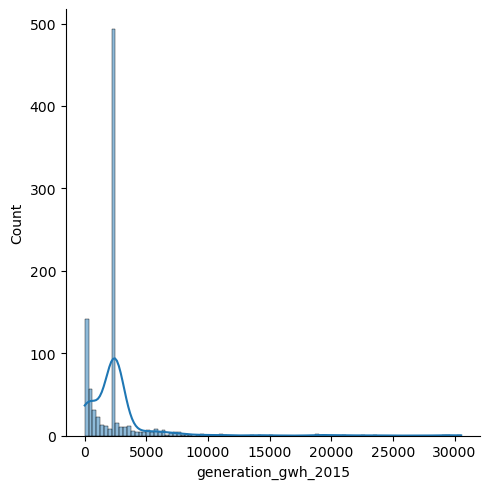

In [59]:
sns.displot(df['generation_gwh_2015'], kde = True)

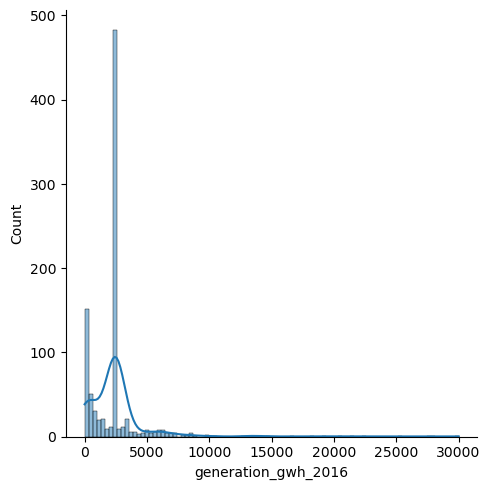

In [60]:
sns.displot(df['generation_gwh_2016'], kde = True)

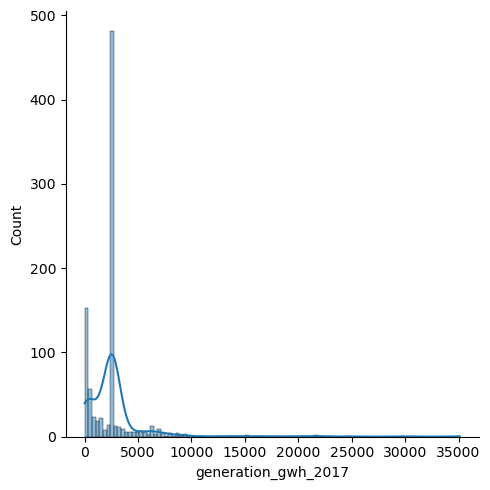

In [61]:
sns.displot(df['generation_gwh_2017'], kde = True)

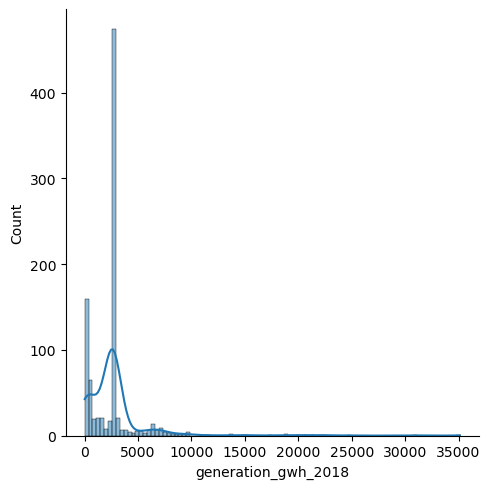

In [62]:
sns.displot(df['generation_gwh_2018'], kde = True)

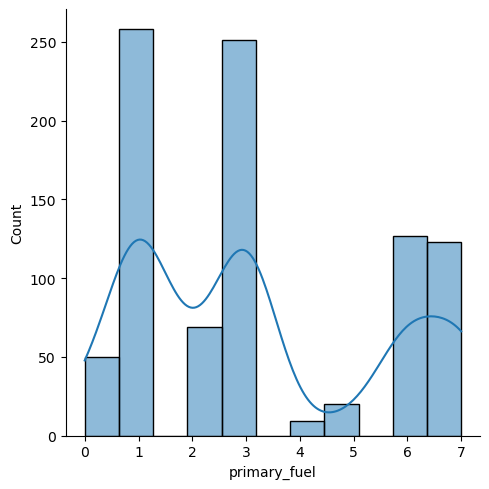

In [63]:
sns.displot(df['primary_fuel'], kde = True)

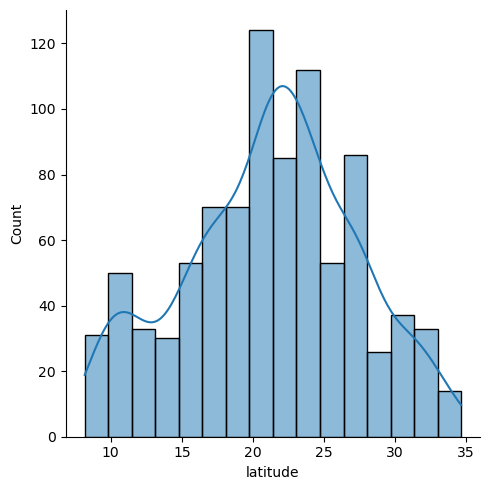

In [64]:
sns.displot(df['latitude'], kde = True)

Preprocessing :

In [65]:
# Seprating the independent variable and dependent variable(target) in x and y before removing the skewness :

x = df.drop('primary_fuel', axis = 1)
y = df['primary_fuel']

In [66]:
x

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,2011.000000,229,109,109,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,0,0,1,519,98.0,24.7663,74.6090,1997.091082,258,174,174,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,0,0,2,853,39.2,21.9038,69.3732,1997.091082,2,21,21,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,0,0,3,0,135.0,23.8712,91.3602,2004.000000,5,22,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,2015.000000,5,22,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,2016.000000,5,22,22,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,0,0,903,822,3.0,12.8932,78.1654,1997.091082,114,77,77,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,0,0,904,891,25.5,15.2758,75.5811,1997.091082,5,21,21,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,0,0,905,539,80.0,24.3500,73.7477,1997.091082,91,59,59,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [67]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

In [68]:
x.skew().sort_values(ascending = False)

generation_gwh_2015       5.364134
generation_gwh_2017       5.110952
generation_gwh_2016       5.068427
generation_gwh_2014       5.035446
generation_gwh_2018       4.937907
capacity_mw               3.123576
source                    1.827373
url                       1.827373
owner                     1.364406
longitude                 1.141881
year_of_capacity_data     0.000000
country                   0.000000
country_long              0.000000
gppd_idnr                 0.000000
name                      0.000000
generation_data_source    0.000000
latitude                 -0.149698
commissioning_year       -1.399359
geolocation_source       -2.159841
dtype: float64

In [69]:
# Using Powertransform method for removing the skewness :

from sklearn.preprocessing import power_transform, PowerTransformer

pt = PowerTransformer()
x_new_pt = pt.fit_transform(x)
x_new_pt

array([[ 0.        ,  0.        , -2.16561515, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 0.        ,  0.        , -2.14663031, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 0.        ,  0.        , -2.13033981, ...,  0.31292509,
         0.32193752,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.54842588, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 0.        ,  0.        ,  1.55136078, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 0.        ,  0.        ,  1.55429474, ...,  0.31292509,
         0.32193752,  0.        ]])

In [70]:
# numpy array :

x_new = power_transform(x)
x_new

array([[ 0.        ,  0.        , -2.16561515, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 0.        ,  0.        , -2.14663031, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 0.        ,  0.        , -2.13033981, ...,  0.31292509,
         0.32193752,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.54842588, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 0.        ,  0.        ,  1.55136078, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 0.        ,  0.        ,  1.55429474, ...,  0.31292509,
         0.32193752,  0.        ]])

In [71]:
# transform II(x)
# transform III(X)

# checking skewness :

pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

owner                     0.467077
generation_gwh_2014       0.123226
generation_gwh_2015       0.074582
generation_gwh_2016       0.041821
capacity_mw               0.022164
generation_gwh_2017       0.018337
longitude                 0.002926
generation_gwh_2018       0.000783
country                   0.000000
year_of_capacity_data     0.000000
generation_data_source    0.000000
country_long              0.000000
latitude                 -0.074269
commissioning_year       -0.080999
url                      -0.214066
source                   -0.214066
name                     -0.288179
gppd_idnr                -0.288179
geolocation_source       -2.132728
dtype: float64

In [72]:
y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [73]:
# oversampling the data :

!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [74]:
# using SMOTE function  :

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [75]:
y.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

# Use Train_Test Model :
    
In Classification Problem -

. accuracy

. classification report

. confusion matrix

. F1 score

. Decision 

. Recall

. crossvalidaion

. AOC,ROC Curve


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [77]:
for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    
    LR.fit(x_train, y_train)
    pred_train = LR.predict(x_train)
    pred_test = LR.predict(x_test)
    if round (accuracy_score (y_train, pred_train)* 100,1) == round(accuracy_score(y_test, pred_test)* 100,1):
        print("At random state", i, "The model performance very well")
        print("At random_state :-", i)
        print("Training accuracy is :-", accuracy_score(y_train, pred_train)* 100)
        print("Testing accuracy is :-", accuracy_score(y_test, pred_test)* 100)

At random state 11 The model performance very well
At random_state :- 11
Training accuracy is :- 63.658388855239245
Testing accuracy is :- 63.68038740920097
At random state 125 The model performance very well
At random_state :- 125
Training accuracy is :- 63.17383403997577
Testing accuracy is :- 63.19612590799032
At random state 229 The model performance very well
At random_state :- 229
Training accuracy is :- 63.23440339188371
Testing accuracy is :- 63.19612590799032
At random state 386 The model performance very well
At random_state :- 386
Training accuracy is :- 63.41611144760751
Testing accuracy is :- 63.438256658595634
At random state 401 The model performance very well
At random_state :- 401
Training accuracy is :- 63.17383403997577
Testing accuracy is :- 63.19612590799032
At random state 441 The model performance very well
At random_state :- 441
Training accuracy is :- 64.4457904300424
Testing accuracy is :- 64.40677966101694
At random state 452 The model performance very well
A

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 899)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.08      0.12      0.09        43
           1       0.14      0.10      0.12        59
           2       0.15      0.11      0.12        47
           3       0.19      0.22      0.21        49
           4       0.13      0.08      0.10        72
           5       0.10      0.14      0.12        49
           6       0.11      0.11      0.11        46
           7       0.11      0.12      0.12        48

    accuracy                           0.12       413
   macro avg       0.13      0.13      0.12       413
weighted avg       0.13      0.12      0.12       413



In [80]:
# cross validation score for logistic regression :

pred_LR = LR.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_LR)
for j in range(2,10):
    lsscore = cross_val_score(LR,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("accuarcy_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 55.91085271317829
accuarcy_score is:- 64.16464891041163


At cv:- 3
Cross validation score is:- 59.25387596899224
accuarcy_score is:- 64.16464891041163


At cv:- 4
Cross validation score is:- 60.513565891472865
accuarcy_score is:- 64.16464891041163


At cv:- 5
Cross validation score is:- 60.94912903453301
accuarcy_score is:- 64.16464891041163


At cv:- 6
Cross validation score is:- 62.06395348837209
accuarcy_score is:- 64.16464891041163


At cv:- 7
Cross validation score is:- 62.20981370756535
accuarcy_score is:- 64.16464891041163


At cv:- 8
Cross validation score is:- 62.257751937984494
accuarcy_score is:- 64.16464891041163


At cv:- 9
Cross validation score is:- 61.826044765099255
accuarcy_score is:- 64.16464891041163




In [81]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
pred_train_dtc = dt.predict(x_train)
print("Testing Accuracy", accuracy_score(y_test, preddt)*100)    #testing accuracy
print("Training Accuracy", accuracy_score(y_train, pred_train_dtc)*100)     # training accuracy
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))
      

Testing Accuracy 86.68280871670703
Training Accuracy 100.0
[[41  2  0  0  0  0  0  0]
 [ 4 32 15  5  2  1  0  0]
 [ 2  3 37  3  0  2  0  0]
 [ 0  6  2 41  0  0  0  0]
 [ 0  4  0  1 67  0  0  0]
 [ 1  0  1  0  0 47  0  0]
 [ 0  0  0  0  0  1 45  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.68      0.54      0.60        59
           2       0.67      0.79      0.73        47
           3       0.82      0.84      0.83        49
           4       0.97      0.93      0.95        72
           5       0.92      0.96      0.94        49
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        48

    accuracy                           0.87       413
   macro avg       0.87      0.87      0.87       413
weighted avg       0.87      0.87      0.86       413



In [82]:
# checking Cross validation score for DecisionTreeClassifier :

score = cross_val_score(dt, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross Validation score is :-", accuracy_score(y_test, preddt) - score.mean())

[0.76997579 0.82082324 0.89588378 0.87409201 0.85679612]
0.8435141869813583
Diff b/w Accuracy Score and Cross Validation score is :- 0.023313900185712


In [83]:
# RandomForestClassier :

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9200968523002422
[[43  0  0  0  0  0  0  0]
 [ 4 40 10  2  3  0  0  0]
 [ 2  2 38  3  0  2  0  0]
 [ 0  3  1 45  0  0  0  0]
 [ 0  0  0  0 71  1  0  0]
 [ 0  0  0  0  0 49  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       0.89      0.68      0.77        59
           2       0.78      0.81      0.79        47
           3       0.90      0.92      0.91        49
           4       0.96      0.99      0.97        72
           5       0.94      1.00      0.97        49
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        48

    accuracy                           0.92       413
   macro avg       0.92      0.92      0.92       413
weighted avg       0.92      0.92      0.92       413



In [84]:
# checking cross validation score for RandomForestClassifier :

score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predRFC) - score.mean())

[0.9031477  0.89104116 0.93946731 0.91041162 0.91747573]
0.9123087049531019
Diff b/w Accuracy Score and Cross validation score is :- 0.007788147347140284


In [85]:
# Supportvectormachine :

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.4552058111380145
[[43  0  0  0  0  0  0  0]
 [13 16 12  2 14  0  0  2]
 [ 5  2 35  0  4  1  0  0]
 [13  1 28  0  7  0  0  0]
 [ 2  2  0  0 68  0  0  0]
 [19  0 18  0  0 12  0  0]
 [46  0  0  0  0  0  0  0]
 [34  0  0  0  0  0  0 14]]
              precision    recall  f1-score   support

           0       0.25      1.00      0.39        43
           1       0.76      0.27      0.40        59
           2       0.38      0.74      0.50        47
           3       0.00      0.00      0.00        49
           4       0.73      0.94      0.82        72
           5       0.92      0.24      0.39        49
           6       0.00      0.00      0.00        46
           7       0.88      0.29      0.44        48

    accuracy                           0.46       413
   macro avg       0.49      0.44      0.37       413
weighted avg       0.52      0.46      0.40       413



In [86]:
# checking cross validation score for SupportvectorMachine :

score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predsvc) - score.mean())

[0.39225182 0.52542373 0.49152542 0.53268765 0.54854369]
0.4980864618350219
Diff b/w Accuracy Score and Cross validation score is :- -0.042880650697007416


In [87]:
# Gradient Boosting Classifier:

from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9346246973365617
[[43  0  0  0  0  0  0  0]
 [ 3 45  6  2  3  0  0  0]
 [ 2  0 38  4  1  2  0  0]
 [ 0  1  1 47  0  0  0  0]
 [ 0  0  0  0 71  1  0  0]
 [ 0  0  1  0  0 48  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       0.98      0.76      0.86        59
           2       0.83      0.81      0.82        47
           3       0.89      0.96      0.92        49
           4       0.95      0.99      0.97        72
           5       0.94      0.98      0.96        49
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        48

    accuracy                           0.93       413
   macro avg       0.93      0.94      0.93       413
weighted avg       0.94      0.93      0.93       413



In [88]:
# checking cross validation score for GradientBoostingClassifier :

score = cross_val_score(GB, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predGB) - score.mean())

[0.88135593 0.86440678 0.9346247  0.90556901 0.85436893]
0.8880650697007452
Diff b/w Accuracy Score and Cross validation score is :- 0.04655962763581656


In [89]:
# ExtraTreesClassifier:

from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9346246973365617
[[43  0  0  0  0  0  0  0]
 [ 4 41  8  4  2  0  0  0]
 [ 2  1 43  1  0  0  0  0]
 [ 0  3  2 44  0  0  0  0]
 [ 0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0 49  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       0.91      0.69      0.79        59
           2       0.81      0.91      0.86        47
           3       0.90      0.90      0.90        49
           4       0.97      1.00      0.99        72
           5       1.00      1.00      1.00        49
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        48

    accuracy                           0.93       413
   macro avg       0.93      0.94      0.93       413
weighted avg       0.94      0.93      0.93       413



In [90]:
# checking cross validation score for ExtraTreesClassifier :

score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print("Diff b/w Accuracy Score and Cross validation score is :-", accuracy_score(y_test, predET) - score.mean())

[0.89104116 0.88619855 0.93220339 0.92736077 0.89563107]
0.9064869884106349
Diff b/w Accuracy Score and Cross validation score is :- 0.02813770892592682


In [91]:
# Hyper Parameter Tunning :

from sklearn.model_selection import GridSearchCV

In [92]:
parameters = {'criterion': ['gini', 'entropy'],
             'random_state' : [10,50,1000],
             'max_depth' : [0,10,20],
             'n_jobs' : [-2,-1,1],
             'n_estimators' : [50,100,200,300]}

In [93]:
GCV =GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [95]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [98]:
final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 50)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_train)
acc = accuracy_score(y_train, pred)
print(acc*100)

100.0


In [ ]:
# Model Saving :

import pickle
filename = 'Global_power_plant.pkl'
pickle.dump(LR, open(filename, 'wb'))

In [101]:
# Conclusion :

import numpy as np
a = np.array(y_test)
predicted = np.array(LR.predict(x_test))
df_com = pd.DataFrame({"Orignal" : a, "predicted" : predicted}, index = range(len(a)))

In [102]:
df_com

,Orignal,predicted
0,7,7
1,2,3
2,6,7
3,4,4
4,7,7
...,...,...
408,1,1
409,6,6
410,2,3
411,4,4
